# Sectioin 2.1: Evaluating the value of a function

### Estimate the remainder term of a Taylor approximation of $cos(0.15)$.

### $\vert R_n(x) \vert = \frac{1}{(n+1)!}\vert x\vert ^{(n+1)}$

In [5]:
import numpy as np
x = 0.15
n = 5
remainder = 1/np.math.factorial(n+1) * x**(n+1)
print(remainder)

1.5820312499999997e-08


### Verify if n=4 is a good approximation by directly comparing the numerical values of $T_n(x)$ and $\cos(x)$.

### $T_4(x) = 1 - \frac{1}{2!}x^2 + \frac{1}{4!}x^4$

In [7]:
x = 0.15
n = 4
taylor_4 = 1 - 1/np.math.factorial(2) * x**2 + 1/np.math.factorial(4) * x**4
cos = np.math.cos(x)
error = taylor_4 - cos

print('taylor: ', taylor_4)
print('cos: ', cos)
print('error: ', error)

taylor:  0.98877109375
cos:  0.9887710779360422
error:  1.5813957809918122e-08


# Section 2.2: Forward difference

### Evalulate numerically the forward difference of $f(x)$ at $x=1$.

### $f(x) = \sin(x)$

### forwad difference: $f'_{fwd}(x) = \frac{sin(x+h) - sin(x)}{h}$

### exact derivative: $f'(x) = \cos(x)$

### $error = \vert f'_{fwd}(x) - f'(x) \vert \approx O(h)$

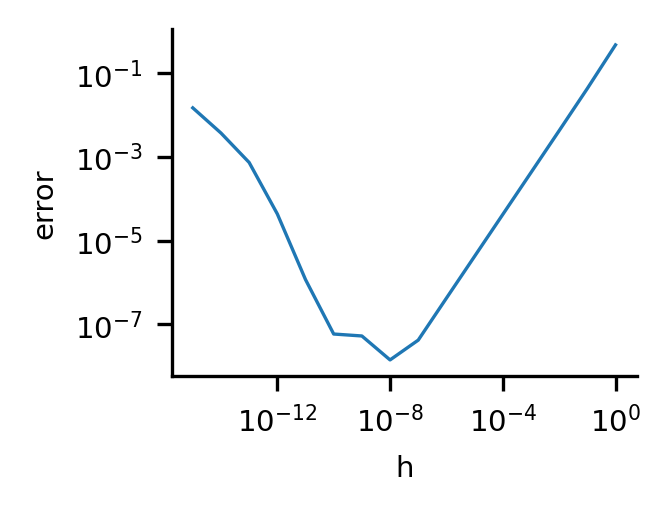

In [4]:
from numpy import sin,cos
from matplotlib import pyplot as plt
plt.style.use('pyplot_setting.mplstyle')

x0=1
N=16
h = [0]*N
err = [0]*N
for i in range(N):
  h[i]=1/10**i
  f_fwd_difference   = (sin(x0+h[i]) - sin(x0))/h[i]
  f_exact_derivative = cos(x0)
  err[i]=abs(f_fwd_difference - f_exact_derivative)
plt.clf()
# plt.plot(h,err)
plt.loglog(h,err)
plt.xlabel('h')
plt.ylabel('error')
plt.show()

### The figure above is supposed to show the truncation error. This is the error introduced by the Taylor approximation. The truncation error decreases untill $10^{-8}$.

### However, if h is smaller than $10^{-8}$ the error increases. This shows there is another source of error.

### This is due to the round-off error. See the notes for analysis of the round-off error.

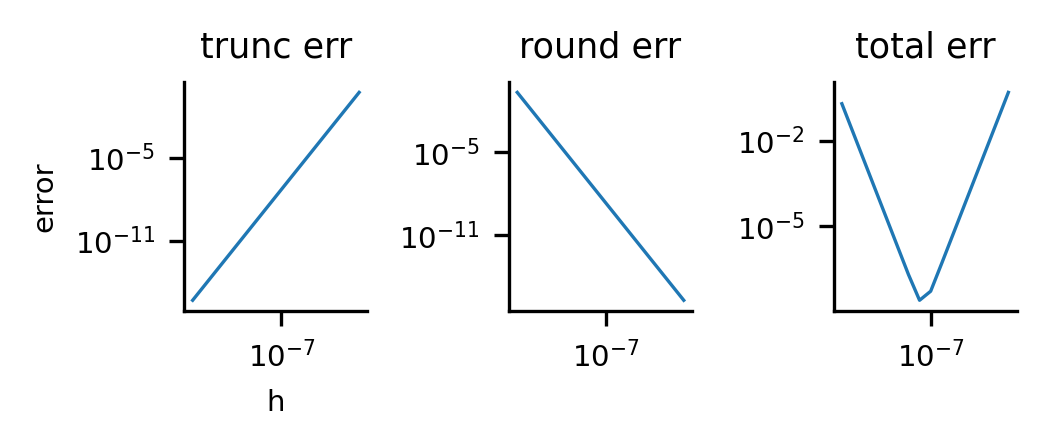

In [26]:
import numpy as np
from numpy import sin,cos
from matplotlib import pyplot as plt
plt.style.use('pyplot_setting.mplstyle')

N=16
h = [0]*N
eps = 10**(-16)
trunc_err = [0]*N
round_err = [0]*N
for i in range(N):
  h[i]=1/10**i
  trunc_err[i] = h[i]/2
  round_err[i] = 2*eps/h[i]
plt.figure(figsize=(3.5,1.5))
plt.subplot(131)
plt.loglog(h,trunc_err)
plt.xlabel('h')
plt.ylabel('error')
plt.title('trunc err')
plt.subplot(132)
plt.loglog(h,round_err)
plt.title('round err')
plt.subplot(133)
plt.loglog(h,np.array(trunc_err) + np.array(round_err))
plt.title('total err')
plt.tight_layout()
plt.show()

# Section 2.2: Centered difference

### Evalulate numerically the centered difference of $f(x)$ at $x=1$.

### $f(x) = \sin(x)$

### centered difference: $f'_{cnt}(x) = \frac{sin(x+h) - sin(x-h)}{2h}$

### exact derivative: $f'(x) = \cos(x)$

### $error = \vert f'_{cnt}(x) - f'(x) \vert \approx O(h^2)$

### Compare the error with $O(h)$ and $O(h^2)$ to verify that the truncation error of centered difference is $O(h^2)$.

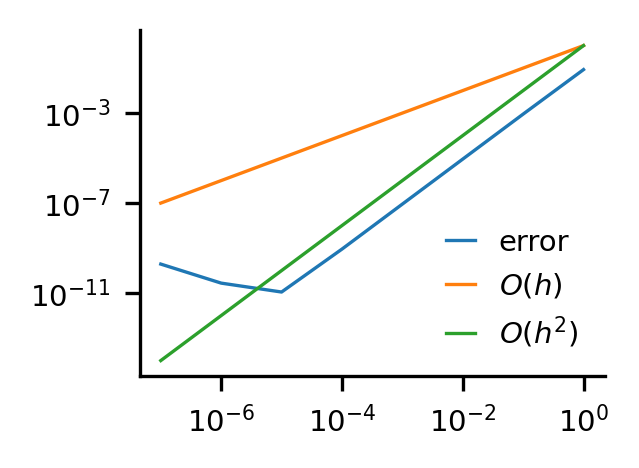

In [29]:
from numpy import sin,cos
from matplotlib import pyplot as plt
x0=1
N=8
h = [0]*N
err = [0]*N
for i in range(N):
  h[i]=1/10**i
  err[i]=abs((sin(x0+h[i])-sin(x0-h[i]))/h[i]/2-cos(x0))
plt.clf()
plt.loglog(h,err,h,h,h,[i**2 for i in h])
plt.legend(['error',r'$O(h)$',r'$O(h^2)$'],loc='lower right')
plt.show()

### Note that the error line is parallel to $O(h^2)$. This means that the truncation error of centered difference decreases by $O(h^2)$.

### We can also estimate the the value of $h$ where the round-off error starts to become larger than the truncation error for the centered difference. This is shown as the turning point around $h=10^{-5}$.